In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('D:\kbopitchingdata.csv')

In [12]:
df.head()

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79


In [28]:
columns_to_keep = [
    'ERA', 'WHIP', 'strikeouts', 'complete_game', 'shutouts', 'saves',
    'innings_pitched', 'hits', 'runs', 'earned_runs', 'home_runs', 'walks', 'win_loss_percentage'
]

df = df[columns_to_keep]
df

,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
0,3.57,1.312,1062,0,18,32,1264.1,1117,557,501,79,542,0.558
1,3.67,1.316,1051,2,6,33,1255.0,1166,581,512,85,486,0.560
2,4.28,1.487,1037,2,10,27,1260.1,1288,653,599,104,586,0.519
3,4.29,1.450,1031,2,14,46,1250.0,1287,653,596,129,526,0.560
4,4.50,1.476,1046,3,10,33,1247.2,1256,686,624,122,585,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,4.68,1.503,790,0,3,33,1171.2,1238,670,609,128,523,0.457
180,5.01,1.468,743,10,6,28,1178.2,1231,727,656,160,499,0.469
181,5.09,1.604,765,0,3,26,1184.2,1253,732,670,127,647,0.464
182,4.82,1.543,813,7,5,25,1185.0,1288,733,634,142,541,0.473


In [21]:
df.replace("?", np.nan, inplace = True)
df.dropna(inplace = True)

In [22]:
X = df.drop(columns = ['win_loss_percentage'])
Y = df['win_loss_percentage'].apply(lambda x: 1 if x >= 0.5 else 0)

In [29]:
# Use Standard Scaler instead of Min Max Scaler
scaler = StandardScaler()

# Fit data
X_train = scaler.fit_transform(X)

In [46]:
# Train and tests
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
Y_train.head()
Y_test.head()

19     0
42     1
156    0
111    0
148    1
Name: win_loss_percentage, dtype: int64

In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [48]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = rf_model.predict(X_test)

In [50]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.8035714285714286


In [51]:
cm = confusion_matrix(Y_test, y_pred)

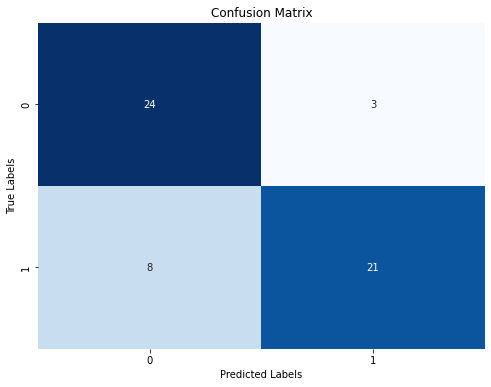

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()